In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# Consider the hepatitis/ pima-indians-diabetes csv file, perform the following date pre-processing.
# 1. Load data in Pandas.
# 2. Drop columns that aren’t useful.
# 3. Drop rows with missing values.
# 4. Create dummy variables.
# 5. Take care of missing data.
# 6. Convert the data frame to NumPy.
# 7. Divide the data set into training data and test data.

In [3]:
df = pd.read_csv('hepatitis_csv.csv')

In [4]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [5]:
threshold = 0.3
df = df[df.columns[df.isnull().mean() < threshold]]

In [6]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,True,live


In [7]:
df = df.dropna()

In [8]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,False,live
10,39,female,False,True,False,False,False,False,True,False,False,False,False,1.3,78.0,30.0,4.4,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,36,female,True,False,False,False,False,True,False,False,False,False,False,0.6,120.0,30.0,4.0,True,live
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,True,live


In [9]:
df = df.replace({True: 1, False:0, 'male': 1, 'female':0, 'live':1, 'die':0})

In [10]:
np.random.seed(42)
shuffle_df = df.sample(frac=1)
 
train_size = int(0.7 * len(df))

train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

X_train = train_set['bilirubin'].values
Y_train = train_set['age'].values

X_test = test_set['bilirubin'].values
Y_test = test_set['age'].values

In [11]:
# 2. a. Construct a CSV file with the following attributes:
# Study time in hours of ML lab course (x)
# Score out of 10 (y)
# The dataset should contain 10 rows.
# b. Create a regression model and display the following:
# Coefficients: B0 (intercept) and B1 (slope)
# RMSE (Root Mean Square Error)
# Predicted responses
# c. Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color.
# d. Implement the model using two methods:
# Pedhazur formula (intuitive)
# Calculus method (partial derivatives, refer to class notes)
# e. Compare the coefficients obtained using both methods and compare them with the analytical solution.
# f. Test your model to predict the score obtained when the study time of a student is 10 hours.

In [12]:
np.random.seed(42)
study_time_hours = np.arange(1, 16)
scores = np.clip(study_time_hours * np.random.uniform(0.4, 0.6) + np.random.normal(0, 1, 15), 0, 10).round()
data = {
    'study_time': study_time_hours,
    'score': scores
}

df = pd.DataFrame(data)

In [13]:
df

,study_time,score
0,1,0.0
1,2,1.0
2,3,2.0
3,4,3.0
4,5,2.0
5,6,2.0
6,7,3.0
7,8,3.0
8,9,2.0
9,10,6.0


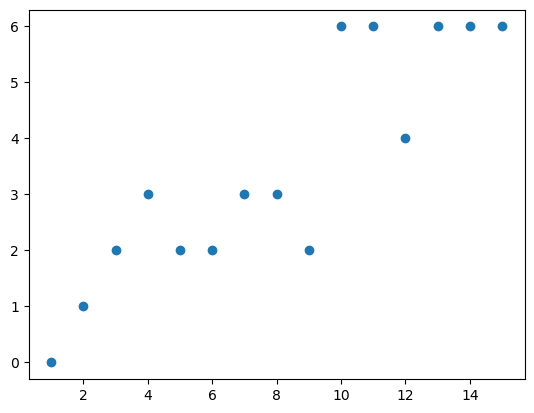

In [14]:
plt.scatter(df['study_time'], df['score'])

In [15]:
np.random.seed(42)
shuffle_df = df.sample(frac=1)
 
train_size = int(0.7 * len(df))

train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

X_train = train_set['study_time'].values
Y_train = train_set['score'].values

X_test = test_set['study_time'].values
Y_test = test_set['score'].values

In [16]:
# Intuitive Method:
X_mean = np.mean(X_train)
y_mean = np.mean(Y_train)

numerator = np.sum((X_train - X_mean) * (Y_train - y_mean))
denominator = np.sum((X_train - X_mean) ** 2)
beta1 = numerator / denominator
beta0 = y_mean - beta1 * X_mean

In [17]:
y_pred = beta0 + beta1 * X_train

In [18]:
rmse = np.sqrt(np.mean((Y_train - y_pred) ** 2))
rmse

0.9141107272890131

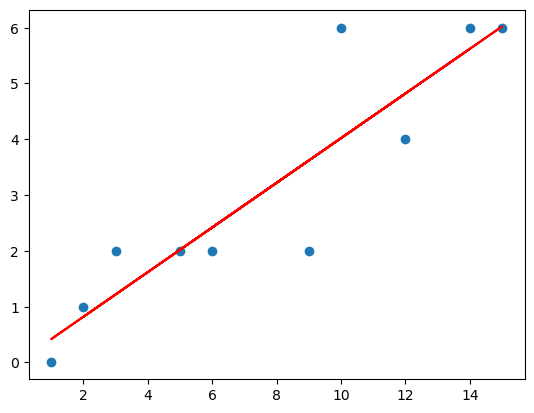

In [19]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, y_pred, color='red')

In [20]:
y_pred_10_hrs = beta1*10 + beta0
y_pred_10_hrs

4.020604997807979

In [21]:
# Calculus Method:

A = [[len(X_train), np.sum(X_train)], [np.sum(X_train), np.sum(X_train ** 2)]]
B = [[np.sum(Y_train)], [np.sum(X_train * Y_train)]]

b0, b1 = np.linalg.inv(A).dot(B)

In [22]:
y_pred = X_train * b1[0] + b0[0]

In [23]:
rmse = np.sqrt(np.mean((Y_train - y_pred) ** 2))
rmse

0.9141107272890131

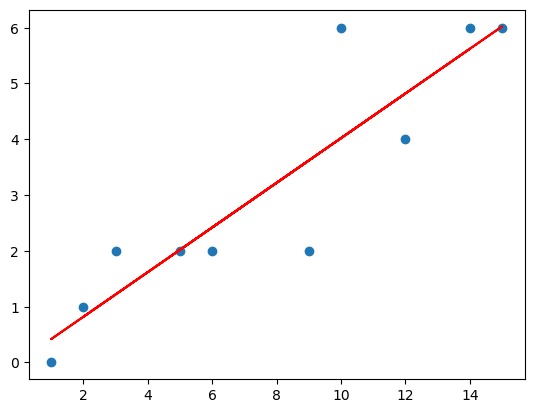

In [24]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, y_pred, color='red')

In [25]:
y_pred_10_hrs = b1*10 + b0
y_pred_10_hrs[0]

4.020604997807975

In [26]:
# Comparing the two approaches
print(b1 - beta1)
print(b0 - beta0)

[-1.66533454e-16]
[-1.77635684e-15]


In [27]:
# Additional Questions:
# 1. a. Consider the hepatitis/diabetes CSV file. Create a regression model and display the following:
# Coefficients: B0 (intercept) and B1 (slope)
# RMSE (Root Mean Square Error)
# Predicted responses
# b. Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color.
# c. Implement the model using two methods:
# 1. Pedhazur formula (intuitive)
# 2. Calculus method (partial derivatives, refer to class notes)
# d. Compare the coefficients obtained using both methods. For a given data point, check the predicted y
# value.

In [28]:
df = pd.read_csv('hepatitis_csv.csv')
df = df[df.columns[df.isnull().mean() < 0.3]]
df = df.dropna()
df = df.replace({True: 1, False:0, 'male': 1, 'female':0, 'live':1, 'die':0})

np.random.seed(42)
shuffle_df = df.sample(frac=1)
train_size = int(0.7 * len(df))
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

X_train = train_set['bilirubin'].values
Y_train = train_set['age'].values
X_test = test_set['bilirubin'].values
Y_test = test_set['age'].values

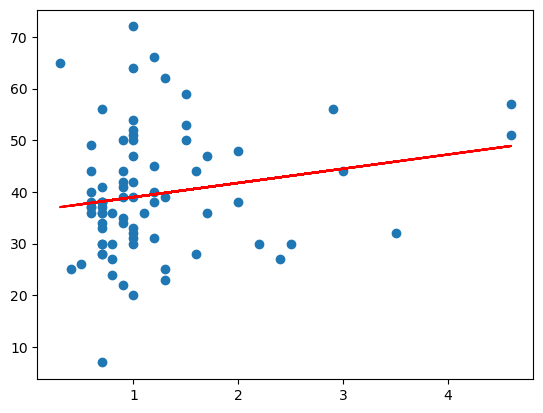

In [29]:
# Intuitive Method:
X_mean = np.mean(X_train)
y_mean = np.mean(Y_train)

numerator = np.sum((X_train - X_mean) * (Y_train - y_mean))
denominator = np.sum((X_train - X_mean) ** 2)
beta1 = numerator / denominator
beta0 = y_mean - beta1 * X_mean

y_pred = beta0 + beta1 * X_train
rmse = np.sqrt(np.mean((Y_train - y_pred) ** 2))
plt.scatter(X_train, Y_train)
plt.plot(X_train, y_pred, color='red')

In [30]:
print(f"RMSE: {rmse}")

RMSE: 11.626570934802725


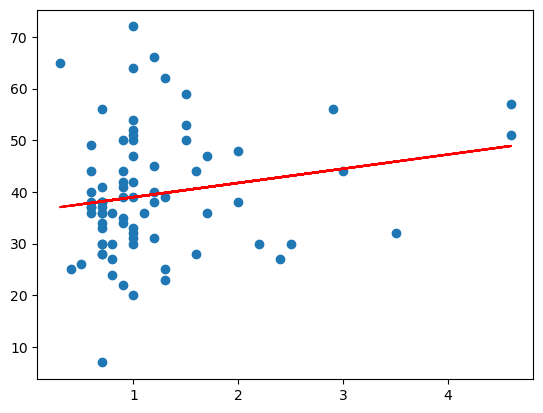

In [31]:
# Calculus Method:
A = [[len(X_train), np.sum(X_train)], [np.sum(X_train), np.sum(X_train ** 2)]]
B = [[np.sum(Y_train)], [np.sum(X_train * Y_train)]]

b0, b1 = np.linalg.inv(A).dot(B)
y_pred = X_train * b1[0] + b0[0]
rmse = np.sqrt(np.mean((Y_train - y_pred) ** 2))
plt.scatter(X_train, Y_train)
plt.plot(X_train, y_pred, color='red')

In [32]:
print(f"RMSE: {rmse}")

RMSE: 11.626570934802723


In [33]:
# Comparing the two approaches
print(b1 - beta1)
print(b0 - beta0)

[-2.66453526e-14]
[0.]
